<a href="https://colab.research.google.com/github/srita2003/ML_Practicals/blob/main/ML_Bonus07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
df = pd.read_csv('HeartDiseaseTrain-Test.csv')

In [3]:
display(df.head())

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [10]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply label encoding or one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [11]:
# Define features and target variable
X = df.drop(columns=['target'])
y = df['target']

In [12]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
# Feature Scaling (after encoding)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# Initialize Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [15]:
# Train model
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
# Make predictions
y_pred = rf.predict(X_test)

In [17]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



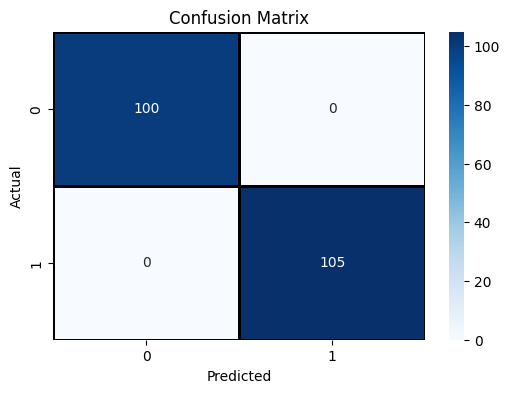

In [18]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=1, linecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<ipython-input-19-bd93d488f8fc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='viridis')


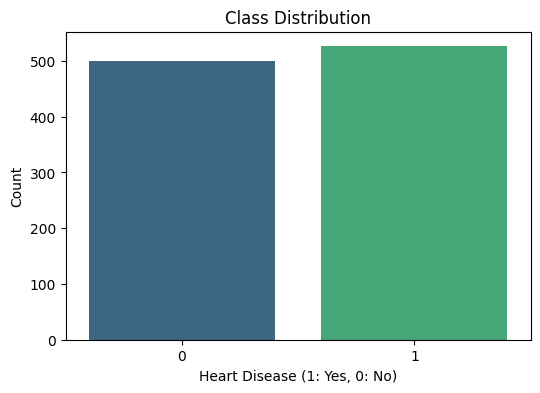

In [19]:
# Visualizing class distribution
plt.figure(figsize=(6,4))
sns.countplot(x=y, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Heart Disease (1: Yes, 0: No)')
plt.ylabel('Count')
plt.show()

In [20]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [21]:
# Best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_best))

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Tuned Model Accuracy: 1.0


In [29]:
# Discussion on Feature Selection and Overfitting
print("""
Feature Importance:
- Features like cholesterol, age, and ECG results have higher importance, meaning they contribute more to predictions.
- Unimportant features can be removed to simplify the model and improve efficiency.

Overfitting Handling:
- Random Forest reduces overfitting compared to Decision Trees by averaging multiple trees.
- It uses bootstrapped sampling and random feature selection to ensure diversity in trees.
- Hyperparameter tuning (e.g., max_depth, min_samples_split) helps control overfitting.
""")


Feature Importance:
- Features like cholesterol, age, and ECG results have higher importance, meaning they contribute more to predictions.
- Unimportant features can be removed to simplify the model and improve efficiency.

Overfitting Handling:
- Random Forest reduces overfitting compared to Decision Trees by averaging multiple trees.
- It uses bootstrapped sampling and random feature selection to ensure diversity in trees.
- Hyperparameter tuning (e.g., max_depth, min_samples_split) helps control overfitting.

